In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from ternary_layers import TernaryConv2D, TernaryDense


In [2]:
train_pd = pd.read_csv('sign_mnist_train.csv')

test_pd = pd.read_csv('sign_mnist_test.csv')

In [3]:
x_train = train_pd.drop(['label'], axis=1).values
y_train = train_pd['label'].values

In [4]:
x_test = test_pd.drop(['label'], axis=1).values
y_test = test_pd['label'].values

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

In [6]:
# Normalize the input

x_train = x_train/ 255

x_test= x_test/ 255

In [7]:
#Build the model

model = keras.Sequential([
    keras.layers.Conv2D(20, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(center= True,scale=False),
    TernaryConv2D(40, kernel_size=(3,3), padding='same', activation='relu', use_bias= False),
    keras.layers.BatchNormalization(center= True,scale=False),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    TernaryConv2D(40, kernel_size=(3,3), padding='same', activation='relu', use_bias=False),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(center= True,scale=False),
    keras.layers.Flatten(),
    TernaryDense(50, activation='relu',use_bias=False),
    keras.layers.BatchNormalization(center= True,scale=False),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(25, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size= 256, validation_data=(x_test, y_test))

Epoch 1/30
108/108 [==============================] - 1s 11ms/step - loss: 3.1108 - accuracy: 0.2249 - val_loss: 3.2140 - val_accuracy: 0.0613
Epoch 2/30
108/108 [==============================] - 1s 8ms/step - loss: 2.8774 - accuracy: 0.5044 - val_loss: 3.1993 - val_accuracy: 0.0803
Epoch 3/30
108/108 [==============================] - 1s 7ms/step - loss: 2.6789 - accuracy: 0.7069 - val_loss: 3.1333 - val_accuracy: 0.1472
Epoch 4/30
108/108 [==============================] - 1s 8ms/step - loss: 2.5335 - accuracy: 0.8373 - val_loss: 2.9709 - val_accuracy: 0.3680
Epoch 5/30
108/108 [==============================] - 1s 7ms/step - loss: 2.4567 - accuracy: 0.8916 - val_loss: 2.7513 - val_accuracy: 0.6274
Epoch 6/30
108/108 [==============================] - 1s 7ms/step - loss: 2.4022 - accuracy: 0.9387 - val_loss: 2.5856 - val_accuracy: 0.7869
Epoch 7/30
108/108 [==============================] - 1s 7ms/step - loss: 2.3663 - accuracy: 0.9626 - val_loss: 2.5085 - val_accuracy: 0.8401
Epoch

In [9]:
loss, acc = model.evaluate(x_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', acc* 100)

225/225 [==============================] - 0s 2ms/step - loss: 2.3925 - accuracy: 0.9109
test loss:  2.3925418853759766
test accuracy:  91.09035134315491


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 20)        60        
_________________________________________________________________
ternary_conv2d (TernaryConv2 (None, 14, 14, 40)        7200      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 40)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 40)          0         
_________________________________________________________________
ternary_conv2d_1 (TernaryCon (None, 7, 7, 40)          1

225/225 - 0s - loss: 2.3925 - accuracy: 0.9109

Test accuracy: 91.09035134315491


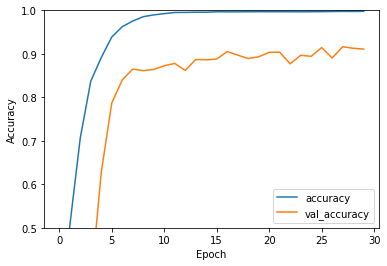

In [11]:
#Evaluate the Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc*100)

In [12]:
model.save("sign_mnist_ternary.h5")

In [13]:
open('sign_mnist_ternary_model.yaml', 'w').write(model.to_yaml())

7892